In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline
df_ori = pd.read_csv('Airbnb_data/listings_SanFan.csv')

In [2]:
df_ori = df_ori.dropna(subset = ['reviews_per_month'])

In [3]:
# u'zipcode',u'location_price',,u'instant_bookable', u'host_is_superhost',u'host_response_rate',
selected_features = [u'price',u'accommodates',u'host_response_time',
       u'bathrooms', u'bedrooms', u'beds',u'security_deposit', u'cleaning_fee',
       u'extra_people', u'minimum_nights', u'maximum_nights',u'guests_included',  
       u'availability_365',
       u'number_of_reviews', u'review_scores_rating',u'review_scores_cleanliness', u'review_scores_checkin',
       u'review_scores_communication', u'review_scores_location',
       u'review_scores_value', u'house_rules',u'amenities','bed_type', 'room_type', 'cancellation_policy', 'property_type']
df = df_ori.loc[:, selected_features]
df = df.apply(lambda x:x.fillna(x.value_counts().index[0])) # fill in the na with the mode
df.head()


,price,accommodates,host_response_time,bathrooms,bedrooms,beds,security_deposit,cleaning_fee,extra_people,minimum_nights,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,house_rules,amenities,bed_type,room_type,cancellation_policy,property_type
0,$56.00,4,within an hour,1.0,1.0,2.0,$100.00,$30.00,$15.00,2,...,10.0,10.0,10.0,10.0,- Private bathroom is on the first floor (slig...,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",Real Bed,Private room,moderate,House
2,$80.00,6,within an hour,1.5,2.0,3.0,$150.00,$65.00,$15.00,1,...,10.0,10.0,10.0,10.0,"I don't ask much, just to please respect the s...","{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,moderate,Townhouse
3,$80.00,2,within a few hours,1.0,1.0,1.0,$100.00,$10.00,$10.00,2,...,10.0,10.0,10.0,10.0,Guests should treat my condo as their home wit...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,flexible,Condominium
4,$20.00,3,within an hour,1.0,1.0,1.0,$100.00,$50.00,$10.00,3,...,10.0,10.0,10.0,9.0,If using the kitchen please clean up after you...,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",Real Bed,Private room,strict,Apartment
5,$28.00,2,within an hour,1.0,1.0,1.0,$100.00,$35.00,$20.00,1,...,10.0,10.0,10.0,10.0,1. NO SMOKING! This rule applies for inside ou...,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",Real Bed,Private room,strict,Condominium


In [4]:
df.dtypes

price                           object
accommodates                     int64
host_response_time              object
bathrooms                      float64
bedrooms                       float64
beds                           float64
security_deposit                object
cleaning_fee                    object
extra_people                    object
minimum_nights                   int64
maximum_nights                   int64
guests_included                  int64
availability_365                 int64
number_of_reviews                int64
review_scores_rating           float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
house_rules                     object
amenities                       object
bed_type                        object
room_type                       object
cancellation_policy             object
property_type            

In [5]:
# FEES and PRICES
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)
df['availability'] = df['availability_365'] / 365

<ipython-input-5-0fef7e5dc564>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace("\$|,", "").astype(float)
<ipython-input-5-0fef7e5dc564>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['security_deposit'] = df['security_deposit'].str.replace("\$|,", "").astype(float)
<ipython-input-5-0fef7e5dc564>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['cleaning_fee'] = df['cleaning_fee'].str.replace("\$|,", "").astype(float)
<ipython-input-5-0fef7e5dc564>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['extra_people'] = df['extra_people'].str.replace("\$|,", "").astype(float)


In [6]:
# # APARTMENT TYPES
enc = LabelEncoder()
room_type = enc.fit( df['room_type'].values )
df['room_type'] = room_type.transform(df['room_type'].values)

In [7]:
# HOUSE RULES
house_rules = df['house_rules'].str.lower()

smoking = house_rules.str.contains("smoke|smoking", na= False)
df.loc[:, 'smoking'] = - smoking # False: No smoking allowed

pet = house_rules.str.contains("pet", na=False)
df.loc[:, 'pet'] = - pet

party = house_rules.str.contains("party|parties", na=False)
df.loc[:, 'party'] = - party

guest = house_rules.str.contains("guest|guests", na=False)
df.loc[:, 'guest'] = - guest

df = df.drop(['house_rules'], axis = 1)


In [8]:
df['amenities'] = df['amenities'].apply(lambda x: x.replace("{", "").replace("}","").replace("\"", "").split(","))

In [9]:
df = df.loc[:,~df.columns.duplicated()]

In [10]:
df['id'] = df.index

In [11]:
amenity_lens = df['amenities'].map(len)

In [12]:
from itertools import chain
amenity_col = list(chain.from_iterable(df.amenities))
repeated_cols = df.columns.difference(["amenities"])

In [13]:
df.columns.difference(["amenities"])

Index(['accommodates', 'availability', 'availability_365', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'cancellation_policy', 'cleaning_fee',
       'extra_people', 'guest', 'guests_included', 'host_response_time', 'id',
       'maximum_nights', 'minimum_nights', 'number_of_reviews', 'party', 'pet',
       'price', 'property_type', 'review_scores_checkin',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_location', 'review_scores_rating', 'review_scores_value',
       'room_type', 'security_deposit', 'smoking'],
      dtype='object')

In [14]:
df_new = pd.DataFrame(
    np.repeat(df[repeated_cols].values, amenity_lens, axis=0), 
    columns=repeated_cols
)

In [15]:
df_new["ameni_list"] = amenity_col

In [16]:
df_1 = pd.concat(
    [df_new.drop(columns=["ameni_list"]), pd.get_dummies(df_new.ameni_list)], axis=1
)

In [17]:
df_2 = df_1.groupby('id').first()

In [18]:
df_2 = pd.concat(
    [df_2.drop(columns=["bed_type"]), pd.get_dummies(df_2.bed_type)], axis=1
)

In [19]:
df_2 = pd.concat(
    [df_2.drop(columns=["cancellation_policy"]), pd.get_dummies(df_2.cancellation_policy)], axis=1
)

In [20]:
df_2 = pd.concat(
    [df_2.drop(columns=["property_type"]), pd.get_dummies(df_2.property_type)], axis=1
)

In [21]:
df_2 = pd.concat(
    [df_2.drop(columns=["host_response_time"]), pd.get_dummies(df_2.host_response_time)], axis=1
)

In [22]:
df_2 = df_2.drop(columns = ['guest'], axis = 1)

In [25]:
df_2.head()

,accommodates,availability,availability_365,bathrooms,bedrooms,beds,cleaning_fee,extra_people,guests_included,maximum_nights,...,Other,Serviced apartment,Timeshare,Townhouse,Vacation home,Villa,a few days or more,within a day,within a few hours,within an hour
id,,,,,,,,,,,,,,,,,,,,,
0,4,0.087671,32,1.0,1.0,2.0,30.0,15.0,2,1125,...,0,0,0,0,0,0,0,0,0,1
2,6,0.432877,158,1.5,2.0,3.0,65.0,15.0,4,90,...,0,0,0,1,0,0,0,0,0,1
3,2,0.142466,52,1.0,1.0,1.0,10.0,10.0,2,4,...,0,0,0,0,0,0,0,0,1,0
4,3,0.315068,115,1.0,1.0,1.0,50.0,10.0,1,20,...,0,0,0,0,0,0,0,0,0,1
5,2,0.000000,0,1.0,1.0,1.0,35.0,20.0,1,7,...,0,0,0,0,0,0,0,0,0,1


import pysal
from pysal.cg.kdtree import KDTree    

locations = np.array(df[['longitude','latitude']])
tree = KDTree(locations, distance_metric='Arc', radius=pysal.cg.RADIUS_EARTH_MILES)
current_point = (-87.68493431,41.97654639)
#get all points within 3 mile of 'current_point'
indices = tree.query_ball_point(current_point, 3)
print(len(indices))

[0.07000521 0.05235654 0.03197849 0.0283566  0.02785211 0.02730471
 0.02505051 0.02246932 0.02118985 0.01918917 0.01843054 0.01760119
 0.01743199 0.01653929 0.01619442 0.01584436 0.01522959 0.01511403
 0.01505936 0.01482033 0.01475979 0.01458134 0.01450196 0.01448157
 0.01441634 0.01440665 0.01437051 0.01434387 0.01433175 0.01432206
 0.01430208 0.01429877 0.01428501 0.01426393 0.01423508 0.0142139
 0.01420216 0.01418244 0.01409249 0.01405486 0.01391247 0.01385536
 0.01368607 0.01350309 0.01314063 0.01286676 0.01260471 0.01242729
 0.01172347 0.01140455]


array([[-1.01217659, -1.50786589,  0.09015103, ...,  0.02657587,
        -0.63661016,  0.46715084],
       [ 1.27955294, -1.2642603 ,  0.48595243, ..., -0.25772189,
        -0.64812658,  0.88036129],
       [-2.12775538, -1.46660117,  0.04514613, ..., -0.00933124,
        -0.1199992 ,  0.38721167],
       ...,
       [ 3.17862096, -1.61195062,  0.27004777, ..., -0.08360441,
        -0.99680595,  0.34492952],
       [ 4.93632709,  2.37855473,  1.05110939, ..., -0.08950739,
        -0.27278645,  1.19273269],
       [ 0.77164106, -1.11046742,  0.71747541, ...,  0.17040656,
        -1.22462766, -0.25648174]])

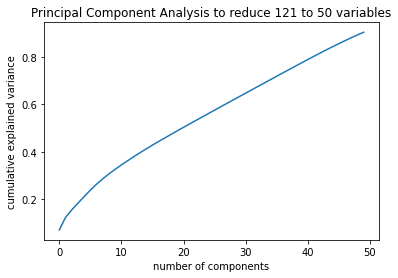

In [23]:
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
# df.drop(['longitude','latitude'], axis=1, inplace=True)
X = np.array(df_2.drop(['price'], axis = 1))
X_scaled = preprocessing.scale(X)
y =df_2['price']
pca = PCA(n_components=50)
X_scaled = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Principal Component Analysis to reduce 121 to 50 variables')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
X_scaled

[2 1 2 ... 1 1 2]


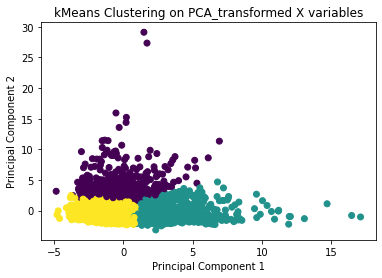

In [24]:
from sklearn.cluster import KMeans
y_pred = KMeans(n_clusters=3, random_state=170).fit_predict(X_scaled)
print(y_pred)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred)
plt.title("kMeans Clustering on PCA_transformed X variables")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [42]:
# group1 = y_pred.index(y_pred == 0)
y_pred
ind1= np.where(y_pred == 1)
ind1
# group1 = X_scaled[ind1,:]
# group1.shape

(array([   1,    8,   12, ..., 4492, 4494, 4495]),)

In [43]:
df_2['cluster'] = y_pred

In [44]:
avg_night = 4.2
rev_rate = 0.5
max_occ_rate = 0.95
book_per_month = df_ori['reviews_per_month']/rev_rate
est_occ = book_per_month * avg_night/30
df_2['est_occ'] = est_occ.apply(lambda x: 0.95 if x > 0.95 else x)

In [45]:
group1 = df_2.query('cluster == 0')

In [46]:
group2 = df_2.query('cluster == 1')

In [47]:
group3 = df_2.query('cluster == 2')

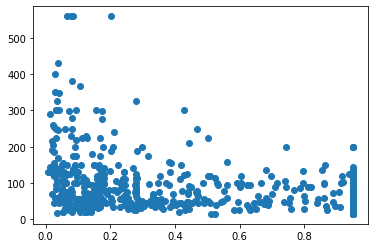

In [51]:
plt.scatter(group1['est_occ'], group1['price'])

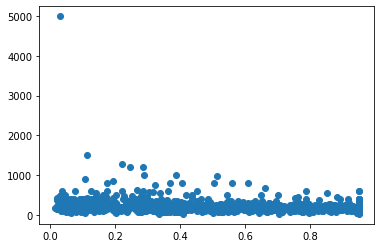

In [52]:
plt.scatter(group2['est_occ'], group2['price'])

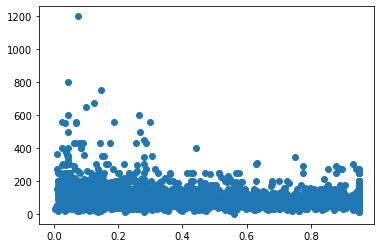

In [53]:
plt.scatter(group3['est_occ'], group3['price'])

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

cluster_data=group1.drop(columns = ['price'], axis = 1)
X=cluster_data
y=group1.loc[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.297 (+/-0.414) for {'n_estimators': 50}
0.300 (+/-0.532) for {'n_estimators': 60}
0.308 (+/-0.434) for {'n_estimators': 70}
0.276 (+/-0.497) for {'n_estimators': 80}
0.297 (+/-0.440) for {'n_estimators': 90}


In [55]:
cluster_data=group2.drop(columns = ['price'], axis = 1)
X=cluster_data
y=group2.loc[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.197 (+/-1.101) for {'n_estimators': 50}
0.054 (+/-1.872) for {'n_estimators': 60}
0.113 (+/-1.582) for {'n_estimators': 70}
0.108 (+/-1.509) for {'n_estimators': 80}
0.142 (+/-1.516) for {'n_estimators': 90}


In [56]:
cluster_data=group3.drop(columns = ['price'], axis = 1)
X=cluster_data
y=group3.loc[:,'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

tunedParameters=[{'n_estimators':range(50,100,10)}]
clf=GridSearchCV(RandomForestRegressor(n_jobs = -1, criterion='mse'), param_grid = tunedParameters,cv=10)

clf.fit(X, y)

means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.215 (+/-0.430) for {'n_estimators': 50}
0.201 (+/-0.462) for {'n_estimators': 60}
0.228 (+/-0.433) for {'n_estimators': 70}
0.244 (+/-0.432) for {'n_estimators': 80}
0.232 (+/-0.450) for {'n_estimators': 90}


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any 

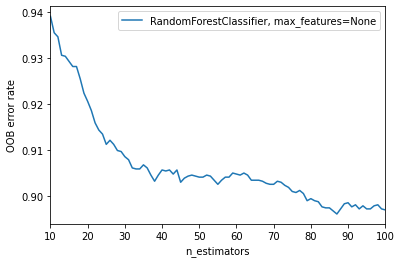

RandomForestRegressor(n_jobs=1)

In [31]:
from collections import OrderedDict
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
ensemble_clfs = [("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=0))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 100

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

from sklearn.ensemble import RandomForestRegressor

tunedParameters = [{'n_estimators':100}]

clf2 = RandomForestRegressor(n_jobs = 1, criterion='mse', n_estimators=100)
#Fit Model
clf2.fit(X, y)

In [32]:
FeatImp = pd.DataFrame({'feature': list(X.columns), 'importance': list(clf2.feature_importances_)})
FeatImp = FeatImp.sort_values('importance', ascending = False)
#Set Index To Field You want to Sort Bar Chart By
FeatImp = FeatImp.set_index('feature')
FeatImp.head(100)
FeatImp.to_csv('feature_imp.csv')

In [33]:
FeatImp.index[0:30]

Index(['bedrooms', 'cleaning_fee', 'minimum_nights', 'bathrooms', 'room_type',
       'security_deposit', 'number_of_reviews', 'extra_people',
       'availability_365', 'availability', 'accommodates', 'maximum_nights',
       'guests_included', 'review_scores_rating', 'beds', 'within a day',
       'within an hour', 'review_scores_location', 'review_scores_value',
       'within a few hours', 'moderate', 'Boat', 'review_scores_cleanliness',
       'Other', 'Condominium', 'party', 'Apartment', 'smoking', 'pet',
       'strict'],
      dtype='object', name='feature')

In [34]:
FeatImp['importance'].values[0:30]

array([0.1636532 , 0.14773593, 0.12689167, 0.09596891, 0.0517097 ,
       0.04427429, 0.04236871, 0.04186329, 0.03804781, 0.03496643,
       0.0319235 , 0.01747759, 0.01640485, 0.01570868, 0.01460359,
       0.0141055 , 0.01380497, 0.0094613 , 0.00685852, 0.00678879,
       0.00654965, 0.00543114, 0.00485602, 0.00445857, 0.00395476,
       0.00387432, 0.00369353, 0.00354212, 0.00351681, 0.00322564])

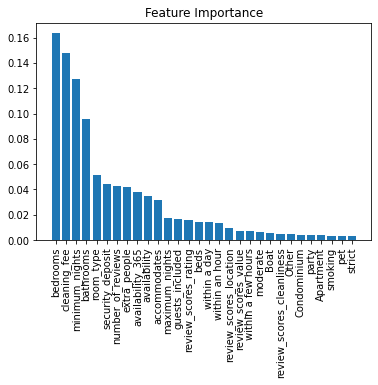

In [35]:
import matplotlib.pyplot as plt
plt.figure()

plt.title("Feature Importance")
y_pos = np.arange(len(FeatImp.index[0:30]))
plt.bar(y_pos,FeatImp['importance'].values[0:30])
plt.xticks(y_pos, FeatImp.index[0:30],rotation='vertical')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


52.8

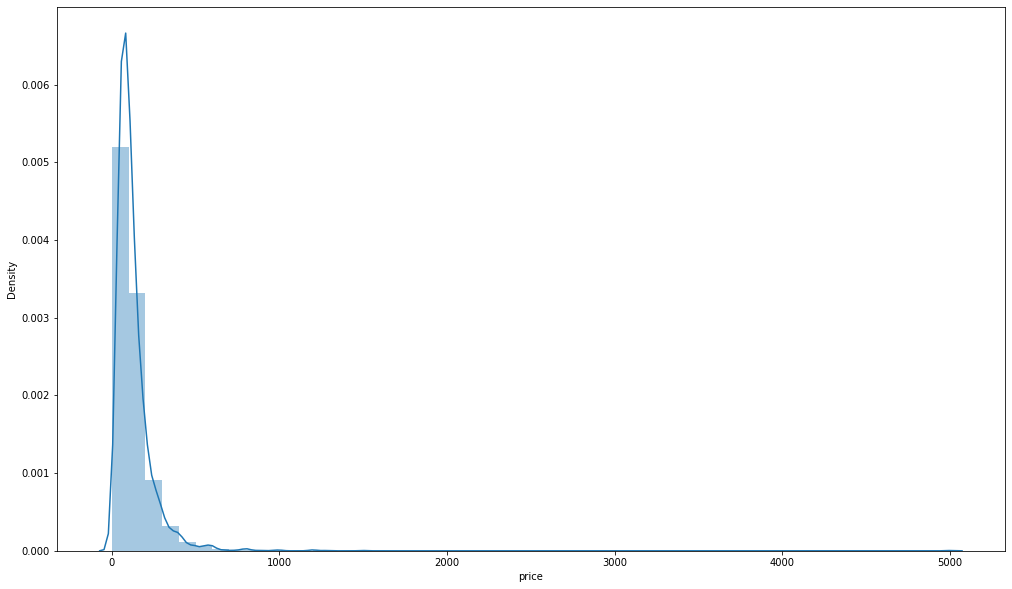

In [36]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(17,10))
# df['price'] = df.price.str.replace("\$|,", "").astype(float)
# df['price'].hist()
sns.distplot(df_2['price'])
# plt.show()
mean_price = df_2.price.iloc[:5].mean()
mean_price
# df['host_acceptance_rate'].head()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='review_scores_rating', ylabel='Density'>

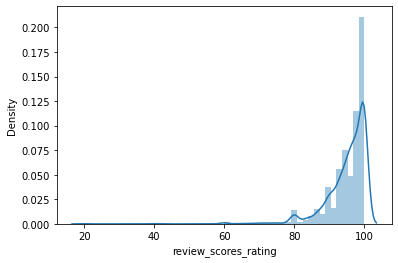

In [37]:
df_2['review_scores_rating'].fillna(0, inplace=True)
df_2['review_scores_rating'].dropna(axis=0, inplace=True)
sns.distplot(df_2['review_scores_rating'])


<AxesSubplot:xlabel='review_scores_rating', ylabel='price'>

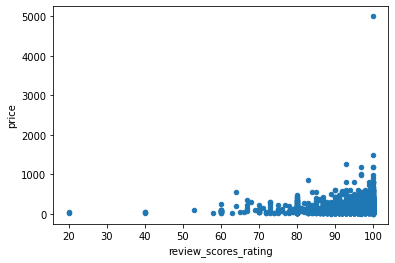

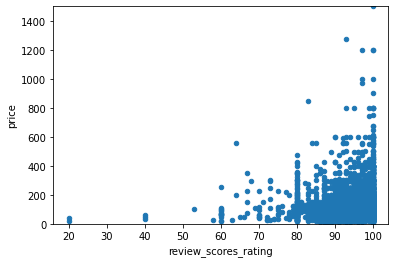

In [38]:
#Correlation Plot
var = 'review_scores_rating'
data = pd.concat([df_2['price'], df_2[var]], axis=1)
data.plot.scatter(x=var, y='price')
data.plot.scatter(x=var, y='price', ylim=(0,1500))

<ipython-input-39-f4fcd8200c6b>:29: FutureWarning: The default value of regex will change from True to False in a future version.
  df['price'] = df['price'].str.replace("\$|,", "").astype(float)
<ipython-input-39-f4fcd8200c6b>:13: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
<ipython-input-39-f4fcd8200c6b>:18: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https:/

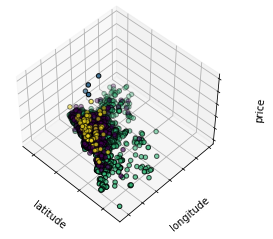

In [39]:
#cluster by locations
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

def plot_3D_clusters(X, k):
    """Plot 3 attributes in dataset to explore natural clusters within data"""
    estimators = {'k_means_3': KMeans(n_clusters=k)}
    fignum = 1
    for name, est in estimators.items():
        fig = plt.figure(fignum, figsize=(4, 3))
        plt.clf()
        ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
        plt.cla()
        est.fit(X)
        labels = est.labels_
        # Change the 2nd column in X[:,_] to choose attributes for plotting
        ax.scatter(X[:,0], X[:,1], X[:,2], c=labels.astype(np.float),edgecolor='k')
        ax.w_xaxis.set_ticklabels([])
        ax.w_yaxis.set_ticklabels([])
        ax.w_zaxis.set_ticklabels([])
        ax.set_xlabel('latitude')
        ax.set_ylabel('longitude')
        ax.set_zlabel('price')
        fignum = fignum + 1
    plt.show()
# change the n
df = pd.read_csv('Airbnb_data/listings_SanFan.csv')
df['price'] = df['price'].str.replace("\$|,", "").astype(float)
X = np.array(df[['latitude', 'longitude', 'price']])
plot_3D_clusters(X, 4)

In [40]:
# Transformation
# right skewed: log transform
# left skewed: power transform


The reason we selected the kNN algorithm is because it determines the response variable Y based on the values of X-variables from k neighbors, which in our case is the values of nearby Airbnb competitors. This is a good model fit for our data because in real life, it is usually the case that real estate, hotel, and Airbnb values are heavily influenced by their surrounding competitors as a function of their location.

In [41]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
# Create KNN model: 5 closest neighbors
knn = KNeighborsRegressor(algorithm='brute', n_neighbors = 5)
cols = ['accommodates', 'bedrooms', 'bathrooms', 'beds']
knn.fit(X_train[cols], y_train)
features_predictions = knn.predict(X_test[cols])
features_mse = mean_squared_error(y_test, features_predictions)
features_rmse = features_mse ** (1/2)

In [61]:
features_rmse

91.19288836794725